In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes

Importing earthquake data from US Geological Survey database 
December 31 to January 7th

In [2]:
df = pd.read_csv('all_week.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-07T01:18:32.890Z,35.622333,-117.463833,7.850000,0.92,ml,17.0,111.000000,0.03265,0.180000,...,2020-01-07T01:25:31.217Z,"17km SSW of Searles Valley, CA",earthquake,0.490000,0.640000,0.136,9.0,reviewed,ci,ci
1,2020-01-07T01:12:37.220Z,35.338167,-117.927667,6.400000,1.25,ml,22.0,55.000000,0.09729,0.190000,...,2020-01-07T01:25:46.274Z,"24km NNE of California City, CA",earthquake,0.310000,0.970000,0.139,21.0,reviewed,ci,ci
2,2020-01-07T01:01:37.770Z,33.493167,-116.791333,9.260000,0.66,ml,29.0,36.000000,0.08501,0.210000,...,2020-01-07T01:05:13.342Z,"9km NE of Aguanga, CA",earthquake,0.300000,0.870000,0.121,18.0,automatic,ci,ci
3,2020-01-07T00:57:49.238Z,36.545059,-98.623428,4.192349,1.94,ml,20.0,86.068748,0.06096,0.236611,...,2020-01-07T01:01:18.830Z,"29km S of Alva, Oklahoma",earthquake,2.794951,1.941433,NaN,16.0,automatic,ok,ok
4,2020-01-07T00:51:03.160Z,17.934600,-66.892100,7.000000,2.31,md,14.0,209.000000,0.04250,0.150000,...,2020-01-07T01:12:00.731Z,"4km SSE of Guanica, Puerto Rico",earthquake,0.630000,0.290000,0.300,10.0,reviewed,pr,pr


Only choosing earthquakes close to Puerto Rico 

In [3]:
min_longitude = -68
max_longitude = -65
min_latitude = 17.5
max_latitude = 19

Choose earthquakes in latitude/longitude box

In [4]:
def get_quakes_in_range(all_quakes,min_longitude,max_longitude,min_latitude,max_latitude, min_mag=0):
    output = []
    for i, row in all_quakes.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        within_longitude = min_longitude < longitude and longitude < max_longitude
        within_latitude = min_latitude < latitude and latitude < max_latitude
        magnitude = row['mag']
        if within_longitude and within_latitude and magnitude > min_mag:
            output.append(row)
        else:
            continue
    return pd.DataFrame(output)

PR_quakes = get_quakes_in_range(df,min_longitude,max_longitude,min_latitude,max_latitude)
        

Number of unique earthquakes within the lat/long constraints

In [5]:
len(PR_quakes)

513

In [6]:
def get_magnitude_color(mag):
    if mag > 5:
        color = 'red'
    elif mag > 4:
        color = 'orange'
    elif mag > 3:
        color = 'yellow'
    elif mag > 2:
        color = 'green'
    else:
        color = 'blue'
    return color

In [7]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


def graph_quakes(quakes_df):
    points_to_graph = []
    data_points = []
    colors =[]
    magnitudes = []
    


    for i, row in quakes_df.iterrows():
        magnitude = row['mag']
        longitude = row['longitude']
        latitude = row['latitude']
        color = get_magnitude_color(magnitude)

        points_to_graph.append(Point((longitude,latitude)))
        data_points.append((longitude,latitude,magnitude))
        magnitudes.append(magnitude*magnitude)
        colors.append(color)
        
    gdf = GeoDataFrame(quakes_df, geometry=points_to_graph)   

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    ax_ = world.plot(figsize=(10, 6))
    ax_.set_xlim((min_longitude,max_longitude))
    ax_.set_ylim((min_latitude,max_latitude))
    gdf.plot(ax=ax_, marker='o', color=colors, markersize=magnitudes);
    return data_points



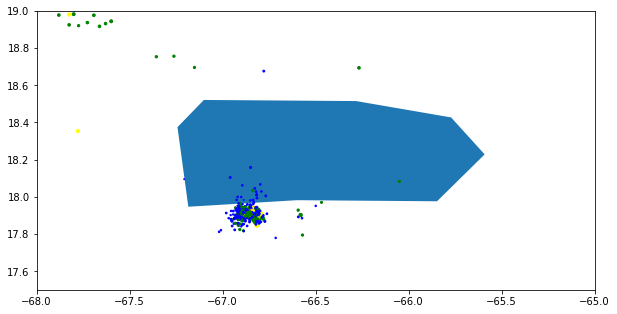

In [8]:
data_points = graph_quakes(PR_quakes)

Quakes higher than magnitude 3

In [9]:
len([row for i,row in PR_quakes.iterrows() if row['mag'] > 3])

28

Quakes higher than magnitude 4

In [10]:
len([row for i,row in PR_quakes.iterrows() if row['mag'] > 4])

7

Let's zoom in to the epicenter area 

In [11]:
min_longitude = -67.2
max_longitude = -66.5
min_latitude = 17.8
max_latitude = 18

[(-66.8921, 17.9346, 2.31),
 (-66.835, 17.9391, 4.4),
 (-66.8851, 17.9233, 2.72),
 (-66.8805, 17.9243, 2.8),
 (-66.8556, 17.926, 3.57),
 (-66.8941, 17.9088, 4.3),
 (-66.79899999999999, 17.9075, 4.9),
 (-66.8171, 17.9415, 2.88),
 (-66.87100000000001, 17.9261, 2.67),
 (-66.7773, 17.8755, 2.15),
 (-66.8443, 17.9341, 3.15),
 (-66.8746, 17.9123, 1.94),
 (-66.786, 17.9036, 0.91),
 (-66.8648, 17.9276, 2.25),
 (-66.8171, 17.9161, 3.02),
 (-66.8058, 17.9266, 2.37),
 (-66.7983, 17.914, 3.06),
 (-66.7938, 17.8895, 2.06),
 (-66.7803, 17.8821, 2.55),
 (-66.875, 17.9101, 3.05),
 (-66.7923, 17.8898, 2.46),
 (-66.8543, 17.8925, 2.54),
 (-66.829, 17.9316, 2.56),
 (-66.7876, 17.8875, 2.97),
 (-66.7996, 17.8875, 2.46),
 (-66.8056, 17.932000000000002, 2.29),
 (-66.7865, 17.8865, 2.34),
 (-66.8018, 17.9236, 2.53),
 (-66.7831, 17.8918, 2.18),
 (-66.8521, 17.9223, 2.82),
 (-66.863, 17.9181, 2.32),
 (-66.8013, 17.8765, 2.46),
 (-66.7923, 17.9108, 3.17),
 (-66.8738, 17.9041, 2.29),
 (-66.8193, 17.8675, 5.8),
 

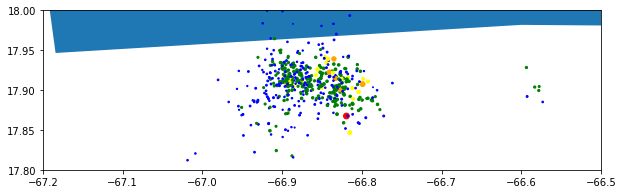

In [12]:
epicenter_quakes = get_quakes_in_range(df,min_longitude,max_longitude,min_latitude,max_latitude)
graph_quakes(epicenter_quakes)

Let's remove the smaller earthquakes to check for trends there

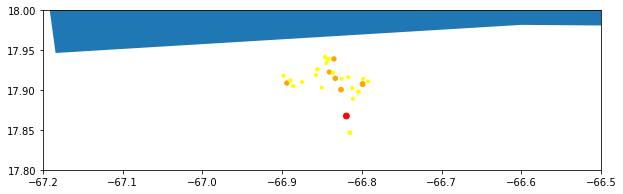

In [13]:
epicenter_quakes = get_quakes_in_range(df,min_longitude,max_longitude,min_latitude,max_latitude,min_mag=3)
data_points = graph_quakes(epicenter_quakes)

Let's use scitkit's k_means to find the optimal center 


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1, random_state=0).fit(data_points)
kmeans.cluster_centers_

array([[-66.83862692,  17.91079615,   3.64346154]])

Now, let's use the elbow method to find optimal number of centers. I coded my own implementation of k_means for this

Iteration 0 WCSS Error:19.737196840000003
Iteration 1 WCSS Error:13.391128722307693
Iteration 2 WCSS Error:13.391128722307693
Iteration 0 WCSS Error:19.723385390000004
Iteration 1 WCSS Error:7.936883364027204
Iteration 2 WCSS Error:4.192088377573697
Iteration 3 WCSS Error:3.0777945297492284
Iteration 4 WCSS Error:2.985462817593985
Iteration 5 WCSS Error:2.985462817593985
Iteration 0 WCSS Error:12.891120470000002
Iteration 1 WCSS Error:4.531835054355583
Iteration 2 WCSS Error:2.5255965471415376
Iteration 3 WCSS Error:2.0551171163095234
Iteration 4 WCSS Error:2.0369078920879122
Iteration 5 WCSS Error:2.0369078920879122
Iteration 0 WCSS Error:12.881787420000002
Iteration 1 WCSS Error:3.4841399174652743
Iteration 2 WCSS Error:2.091761425630357
Iteration 3 WCSS Error:1.993744810833333
Iteration 4 WCSS Error:1.978134753142857
Iteration 5 WCSS Error:1.978134753142857
Iteration 0 WCSS Error:3.19555184
Iteration 1 WCSS Error:2.038548574374997
Iteration 2 WCSS Error:1.9022297975
Iteration 3 WCSS

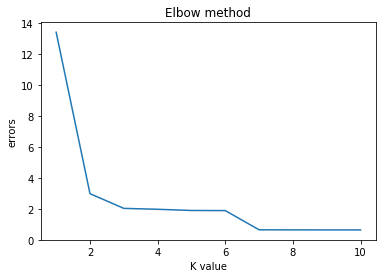

In [15]:
from k_means import k_means
best_k = k_means.elbow_method(data_points)

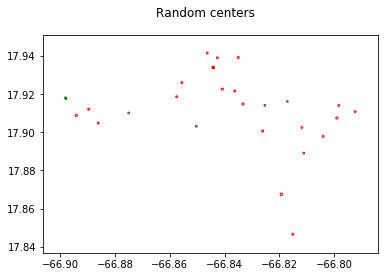

Iteration 0 WCSS Error:19.723385390000004
Iteration 1 WCSS Error:7.936883364027204
Iteration 2 WCSS Error:4.192088377573697
Iteration 3 WCSS Error:3.0777945297492284
Iteration 4 WCSS Error:2.985462817593985
Iteration 5 WCSS Error:2.985462817593985


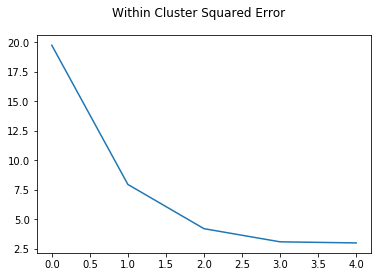

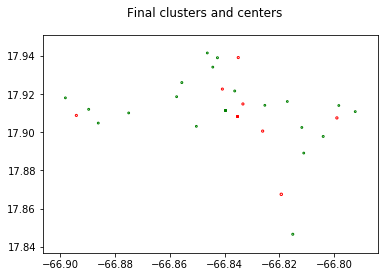

{'final_error': 2.985462817593985,
 'centers': [(-66.83537142857143, 17.9087, 4.685714285714285),
  (-66.83982631578947, 17.911568421052635, 3.2594736842105267)]}

In [16]:
best_centers = k_means.run_k_means(k=2,points=data_points)
best_centers

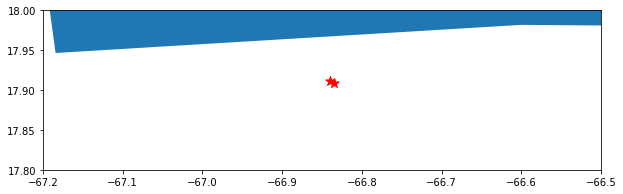

In [17]:
def graph_centers(centers):
    points_to_graph = []
    
    for center in centers:
        longitude = center[0]
        latitude = center[1]
        points_to_graph.append(Point((longitude,latitude)))
        
    gdf = GeoDataFrame(pd.DataFrame(centers), geometry=points_to_graph)   

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    ax_ = world.plot(figsize=(10, 6))
    ax_.set_xlim((min_longitude,max_longitude))
    ax_.set_ylim((min_latitude,max_latitude))
    gdf.plot(ax=ax_, marker='*', color='red', markersize=100);
graph_centers(best_centers['centers'])
        